In [1]:
%matplotlib widget
from dataclasses import dataclass
from typing import Callable, Dict, Tuple

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scistats

# Random Variables
Alex Gorodetsky, Jan 23, 2024

## Definition

Consider a probability triple $(\Omega, \mathcal{F}, P).$ A random variable $X:\Omega \to \mathbb{R}$ is a function that allows us to assign real numbers to subsets of the sample space. This function can be viewed as generating a new probability distribution on the set of real numbers. This resulting probability triple is given by $(\mathbb{R}, \mathcal{B}, P_x),$ where $\mathcal{B}$ is the Borel $\sigma$-algebra --- the $\sigma$-algebra associated with all the "nice" sets formed from open intervals on the real line).

For this function to be useful in probability (and indeed for it to be a *random variable*), we require that for any set $B \in \mathcal{B}$, the inverse $X^{-1}(B) \equiv \{\omega; X(\omega) \in B\} \in \mathcal{F}.$ Indeed we need the full set $$\{X^{-1}(B) ; B \in \mathcal{B}\} \subset \mathcal{F}.$$ This "reduced" $\sigma$-algebra is called the $\sigma-$algebra generated by the random variable $X$: $$\mathcal{F}_X = \{X^{-1}(B) ; B \in \mathcal{B}\}.$$ This generated $\sigma$-algebra represents the subset of events over which we can reason probabilistically. The associated probability measure is defined as $$P_X(X = B) = P(X^{-1}(B))= P(\{\omega; X(\omega) \in B\} ).$$

## Statistical Characterizations

In this notebook we will look at random variables and their characterization through the cumulative distribution function $F_X(x) = P_X\left(X \leq x\right)$ and their density function $f_X(x) = \frac{\partial F_X}{\partial x}$. We focus on continuous random variables. 

I want to be super pedantic about all of these symbols and interpretations to ensure that the notation is clear.  Let us explore the meaning of $P_X\left(X \leq x \right).$ This notation explicitly means $$P_X(X \leq x) = P(\{\omega; \omega \in \Omega, X(\omega) \leq x\}).$$ In otherwords "$X \leq x$" corresponds to the event $A = \{\omega; \omega \in \Omega, X(\omega) \leq x\}$, and this event is in $\mathcal{F}$ ($A \in \mathcal{F}$) because $X$ is $\mathcal{F}$-measurable.

## Examples

We will be using the scipy stats package __[scipy stats package](https://docs.scipy.org/doc/scipy/reference/stats.html)__ since it has a very nice interface to random variables. However, in your projects make sure to code as much as possible using only very elementary functions, not this package. 

For each continuous random variable, this package provides functions to evaluate the CDF and PDF, amongst many other functions. We will now create some code to visualize some canonical random variables that are included in the package

For each random variable lets create a class that stores the pertinent information.

In [2]:
@dataclass  # a python decorator that builds some machinery for data classes
class RVPlotInfo:
    """Information needed to plot the cdf and pdf of a random variable."""
    x: np.ndarray
    cdf: np.ndarray
    pdf: np.ndarray


def get_rv_plot_info(rv: scistats.rv_continuous,
                     N: int = 100,
                     ppm_thresh: float = 1e-2) -> RVPlotInfo:
    """Get an array of x, pdf, and cdf for a scipy stat random variable.

    Args:
        rvs: A dictionary containing random variables to plot. The keys are the names
        N: Number of points to plot
        ppm_thresh: threshold probability for plotting tails

    Notes:
        Makes use of the ppm, pdf, and cdf functions provided by scipy.stats
        continuous random variables
    """
    x = np.linspace(rv.ppf(ppm_thresh), rv.ppf(1.0 - ppm_thresh), N)
    pdf = rv.pdf(x)
    cdf = rv.cdf(x)

    return RVPlotInfo(x, cdf, pdf)


def visualize(rvs: Dict[str, RVPlotInfo]) -> None:
    """Visualize the CDF and PDF of a random variable.

    Args:
        rvs: A dictionary containing random variables to plot. The keys are the names.

    """
    _, ax = plt.subplots(1, 2, figsize=(5, 3))
    for key, rv in rvs.items():
        ax[0].plot(rv.x, rv.cdf, '-', label=key)
        ax[1].plot(rv.x, rv.pdf, '-')
    ax[0].legend()
    ax[0].set_xlabel(r'$x$')
    ax[0].set_ylabel(r'$F_X(x)$')
    ax[0].set_title('CDF')
    ax[0].grid(which='both')

    ax[1].set_xlabel(r'$x$')
    ax[1].set_ylabel(r'$f_X(x)$')
    ax[1].set_title('PDF')
    ax[1].grid(which='both')
    plt.tight_layout()

We can now look at some random variables. Lets begin with the simplest 
### The uniform random variable

$$f(x) = \frac{1}{|\Omega|}, \quad \text{if} \quad x \in \Omega$$

Example: $X(\omega) = \omega,  \quad \Omega = [0,1]$

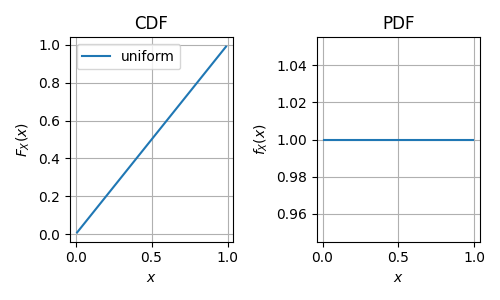

In [3]:
visualize({"uniform": get_rv_plot_info(scistats.uniform())})

### The Gaussian Random Variable

$$f_X(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left\{-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}\right\}$$


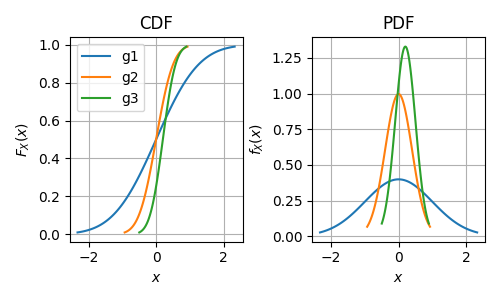

In [4]:
visualize({"g1": get_rv_plot_info(scistats.norm(loc=0.0, scale=1.0)),
           "g2": get_rv_plot_info(scistats.norm(loc=0.0, scale=0.4)),
           "g3": get_rv_plot_info(scistats.norm(loc=0.2, scale=0.3))})

### The Laplace Random Variable

$$f_X(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left\{-\frac{1}{2} \frac{|x-\mu|}{\sigma^2}\right\}$$


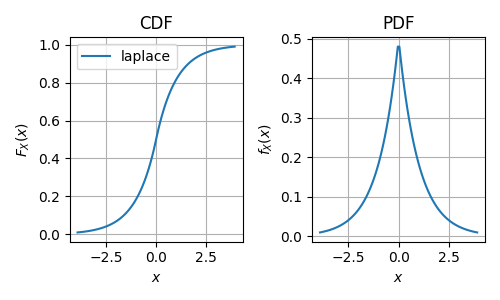

In [5]:
visualize({"laplace": get_rv_plot_info(scistats.laplace())})

### Cauchy 

$$f(x; x_0, \gamma) = \frac{1}{\pi \gamma \left[ 1 + \left(\frac{x - x_0}{\gamma}\right)^2 \right]} $$

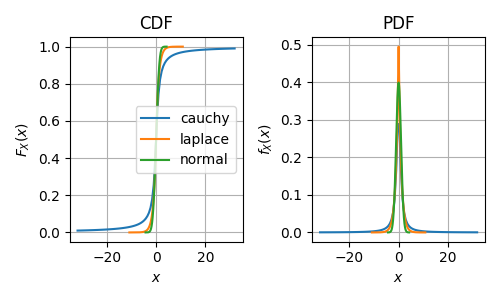

In [6]:
# A comparison between the Cauchy, Normal, and Laplace,
visualize({"cauchy": get_rv_plot_info(scistats.cauchy()),
           "laplace": get_rv_plot_info(scistats.laplace(), ppm_thresh=1e-5, N=1000),
           "normal": get_rv_plot_info(scistats.norm(), ppm_thresh=1e-5, N=1000)})

### The Inverse Gamma

$$ f(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{-\alpha-1} \exp\left( -\frac{\beta}{x}\right) $$

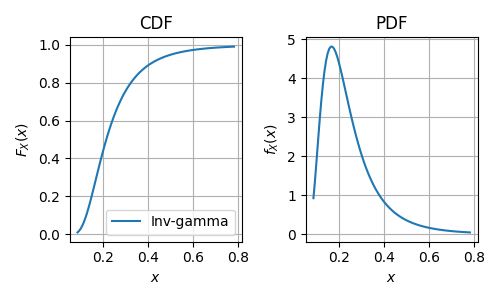

In [7]:
visualize({"Inv-gamma": get_rv_plot_info(scistats.invgamma(a=5.0))})  # beta=1

## Lets make our own random variables

We saw that if you build random variables from other random variables using simple algebraic operations, you also end up having random variables. In this way we can construct random variables. 

We begin with a utility that takes a random variable and extracts its CDF and PDF

In [8]:
def rv_to_cdf_pdf(x_omega: np.ndarray,
                  x_eval: np.ndarray,
                  rv: Callable[[np.ndarray], np.ndarray])  \
        -> Tuple[np.ndarray, np.ndarray]:
    """Evaluate the cdf and the pdf of a random variable defined as a function

    Args:
        x_omega: an array of points in the input space to the random variable
        x_eval: an array of points at which to 'discretize' and compute a numerical approximation
        rv: a continuous random variable (a function from omega -> real)

    Returns:
        pdf: array of pdf values at x_eval
        cdf: array of cdf values at x_omega
    """
    assert x_omega.shape >= x_eval.shape, "x_eval shape should be smaller for numerical reasons"
    cdf = np.zeros((x_eval.shape))
    pdf = np.zeros((x_eval.shape))
    rv_evals = rv(x_omega)
    npoints_input = x_omega.shape[0]
    for ii, xx in enumerate(x_eval):
        cdf[ii] = np.sum(rv_evals < xx) / npoints_input  # an approximation --- fraction of evaluations less than x
    pdf[1:] = (cdf[1:] - cdf[0:-1]) / (x_eval[1:] - x_eval[:-1])  # finite difference approximation to derivative
    return cdf, pdf

We will now run through some examples. For all of these examples we will assume that $\Omega \in [0, 1]$.

We now define a function, which we will repeatedly modify

In [39]:
def custom_rv(xinput: np.ndarray) -> np.ndarray:
    """A random variable derived as a function of real numbers"""
    #f1 = 1.0 - xinput
    #f1 = xinput
    #return f1
#    f2 = xinput**2 * np.sin(10.0*xinput)
#    return f2
#    f3 = xinput**2
#    return f3
#    f4 = 1.0/(xinput+1)
#    return f4
    #f5 = np.sin(10.0*xinput)
    f5 = np.cos(10.0 * xinput) + np.sin(10.0 * xinput)
    return f5
#    f6 = np.exp(xinput)
#    return f6
#    f7 = np.exp(-(xinput-0.5)**2 / 0.01)
#    return f7
#    f8 = np.zeros(xinput.shape[0])
#    f8[xinput > 0] = np.sin(10.0 * xinput[xinput>0])
#    f8[xinput <= 0] = np.cos(10.0 * xinput[xinput <=0])
#    return f8

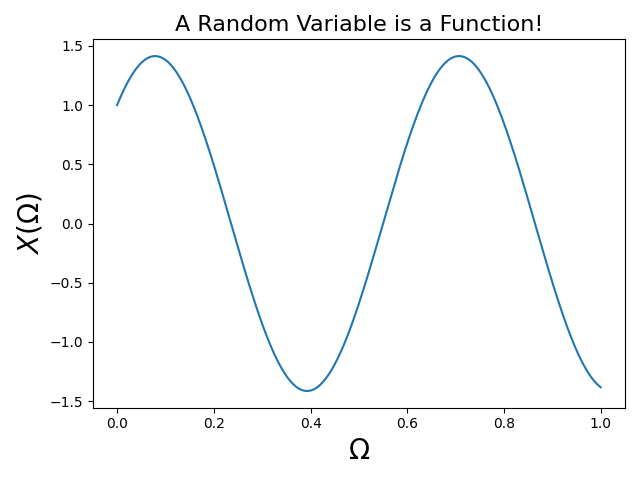

In [40]:
plt.close(1321)
plt.figure(1321)
xomega = np.linspace(0, 1, 100000)
plt.plot(xomega, custom_rv(xomega))
plt.xlabel(r'$\Omega$', fontsize=20)
plt.ylabel(r'$X(\Omega)$', fontsize=20)
plt.title("A Random Variable is a Function!", fontsize=16)
plt.tight_layout()
plt.show()

We can now look at the PDF and CDF that result in this function, the best way to intuit this is to turn the function on its side and think about the "distribution of values of $X$"

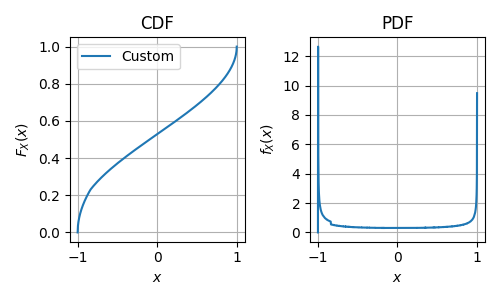

In [30]:
xeval = np.linspace(-1.0, 1.0, 1000)
glob_cdf, glob_pdf = rv_to_cdf_pdf(xomega, xeval, custom_rv)
rvp = RVPlotInfo(xeval, glob_cdf, glob_pdf)
visualize({"Custom": rvp})

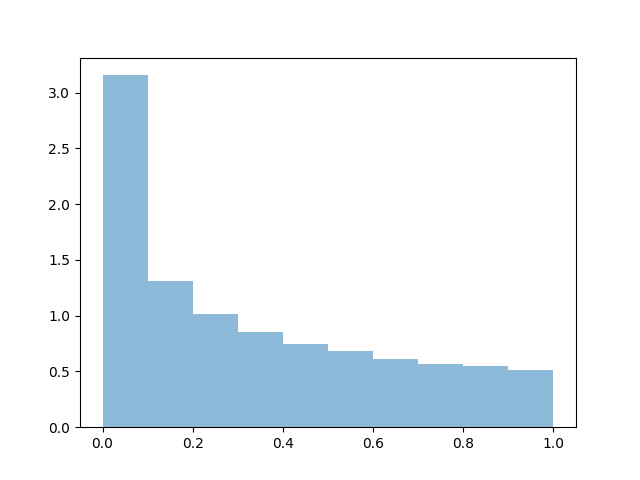

In [12]:
plt.figure()
plt.hist(custom_rv(np.random.rand(100000)), alpha=0.5, density=True)
plt.show()